In [1]:
'''
Creating to run Model D Conv1d_mfcc40
different layer system
mfcc 13 avg features
Created on 2020.12.11 at 1038

'''
# libraries
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.layers import Conv1D, Conv2D, LSTM
from tensorflow.keras.layers import AveragePooling1D, GlobalAveragePooling2D, MaxPooling1D
from tensorflow.keras.models import Model, model_from_json, Sequential

# added this to plot
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [2]:
# load datasets

# assigning the pickle files
with open('./Data_Array_Storage/X_train_mfccavg_axis0_pol.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('./Data_Array_Storage/X_test_mfccavg_axis0_pol.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('./Data_Array_Storage/y_train_mfccavg_axis0_pol.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('./Data_Array_Storage/y_test_mfccavg_axis0_pol.pkl', 'rb') as f:
    y_test = pickle.load(f)
    
print('dataset loaded')

dataset loaded


In [3]:
# input shape
input_shape = (X_train.shape[1], X_train.shape[2])
print(input_shape)

(216, 1)


In [42]:
def model_d_conv1d(input_shape):
    model = Sequential()
    model.add(Conv1D(32, 3, padding='same',input_shape=input_shape))  # X_train.shape[1] = No. of Columns (216)
    model.add(Activation('relu'))
    model.add(Conv1D(32, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3))) # added drop out and maxpooling layer on 20201209 at 1330
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(256, 3, padding='same'))
    model.add(Activation('relu'))
#     model.add(LSTM(64))
    model.add(Flatten())
    model.add(Dense(3)) # Target class number
    model.add(Activation('softmax'))
    
    # model optimizer
#     model = model_d_conv1d(input_shape)
    optimizer = tf.keras.optimizers.RMSprop(lr=0.000001, decay=1e-6)
    
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

    return model

In [4]:
def model_d_conv1d_flip(input_shape):
    model = Sequential()
    model.add(Conv1D(256, 3, padding='same',input_shape=input_shape))  # X_train.shape[1] = No. of Columns (216)
    model.add(Activation('relu'))
    model.add(Conv1D(256, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3))) # added drop out and maxpooling layer on 20201209 at 1330
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(32, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(3)) # Target class number
    model.add(Activation('softmax'))
    
    # model optimizer
#     model = model_d_conv1d(input_shape)
    optimizer = tf.keras.optimizers.RMSprop(lr=0.000001, decay=1e-6)
    
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

    return model

In [43]:
# load model and input shape
# from models import model_d_conv1d

# model = model_d_conv1d_flip(input_shape)
model = model_d_conv1d(input_shape)
# optimizer = tf.keras.optimizers.RMSprop(lr=0.000001, decay=1e-6)

print('input shape, model, optimizer loaded')

model.summary()

input shape, model, optimizer loaded
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_27 (Conv1D)           (None, 216, 32)           128       
_________________________________________________________________
activation_30 (Activation)   (None, 216, 32)           0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 216, 32)           3104      
_________________________________________________________________
batch_normalization_6 (Batch (None, 216, 32)           128       
_________________________________________________________________
activation_31 (Activation)   (None, 216, 32)           0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 216, 32)           0         
_________________________________________________________________
max_pooling1d_9 (

In [44]:
# callback list: ModelCheckpoint, reduceLROnPlat, EarlyStopping
# checkpoint_path = "./models_saved/model_d_conv1d_v3.h5"

checkpoint_path = "./models_saved/model_d_conv1d_mfccavg_pol.h5"

# Create a callback that saves the model's weights
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=False,
                                                 save_best_only=True,
                                                 verbose=1), # 1 tells your which epoch is saving
#                                                  monitor='val_categorical_accuracy',  # added for emo1d
#                                                  mode='max'), # added for emo1d
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', # changed from 'val_accuracy', 'val_loss'
                                                patience=5, 
                                                restore_best_weights=True),
#                                                 verbose = 1, # added verbose for emo1d
#                                                 mode = 'min'), # added for emo1d
               tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                    patience=2, 
                                                    factor=0.5, 
                                                    min_lr=0.000001, 
                                                    verbose=1)]

print('callbacks and checkpoints set')

callbacks and checkpoints set


In [39]:
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizer,
#               metrics=['accuracy'])

# print('model compiled')

model compiled


In [45]:
batch_size = 64

model_history=model.fit(X_train, 
                        y_train,
                        batch_size=batch_size,
                        epochs=150,
                        validation_data=(X_test, y_test),
                        verbose=2,
                        callbacks=callbacks)

Epoch 1/150

Epoch 00001: val_loss improved from inf to 1.04250, saving model to ./models_saved/model_d_conv1d_mfccavg_pol.h5
305/305 - 14s - loss: 1.0311 - accuracy: 0.4990 - val_loss: 1.0425 - val_accuracy: 0.6166
Epoch 2/150

Epoch 00002: val_loss improved from 1.04250 to 0.97341, saving model to ./models_saved/model_d_conv1d_mfccavg_pol.h5
305/305 - 14s - loss: 0.9554 - accuracy: 0.6319 - val_loss: 0.9734 - val_accuracy: 0.6243
Epoch 3/150

Epoch 00003: val_loss improved from 0.97341 to 0.94513, saving model to ./models_saved/model_d_conv1d_mfccavg_pol.h5
305/305 - 12s - loss: 0.9210 - accuracy: 0.6345 - val_loss: 0.9451 - val_accuracy: 0.6243
Epoch 4/150

Epoch 00004: val_loss improved from 0.94513 to 0.93099, saving model to ./models_saved/model_d_conv1d_mfccavg_pol.h5
305/305 - 12s - loss: 0.9020 - accuracy: 0.6346 - val_loss: 0.9310 - val_accuracy: 0.6243
Epoch 5/150

Epoch 00005: val_loss improved from 0.93099 to 0.92218, saving model to ./models_saved/model_d_conv1d_mfccavg_p

Epoch 39/150

Epoch 00039: val_loss improved from 0.86080 to 0.86038, saving model to ./models_saved/model_d_conv1d_mfccavg_pol.h5
305/305 - 17s - loss: 0.8221 - accuracy: 0.6598 - val_loss: 0.8604 - val_accuracy: 0.6543
Epoch 40/150

Epoch 00040: val_loss improved from 0.86038 to 0.86007, saving model to ./models_saved/model_d_conv1d_mfccavg_pol.h5
305/305 - 13s - loss: 0.8212 - accuracy: 0.6615 - val_loss: 0.8601 - val_accuracy: 0.6547
Epoch 41/150

Epoch 00041: val_loss improved from 0.86007 to 0.85973, saving model to ./models_saved/model_d_conv1d_mfccavg_pol.h5
305/305 - 14s - loss: 0.8201 - accuracy: 0.6614 - val_loss: 0.8597 - val_accuracy: 0.6541
Epoch 42/150

Epoch 00042: val_loss improved from 0.85973 to 0.85870, saving model to ./models_saved/model_d_conv1d_mfccavg_pol.h5
305/305 - 14s - loss: 0.8190 - accuracy: 0.6620 - val_loss: 0.8587 - val_accuracy: 0.6545
Epoch 43/150

Epoch 00043: val_loss did not improve from 0.85870
305/305 - 15s - loss: 0.8181 - accuracy: 0.6620 - v

Epoch 80/150

Epoch 00080: val_loss did not improve from 0.84307
305/305 - 10s - loss: 0.8034 - accuracy: 0.6701 - val_loss: 0.8433 - val_accuracy: 0.6650
Epoch 81/150

Epoch 00081: val_loss improved from 0.84307 to 0.84231, saving model to ./models_saved/model_d_conv1d_mfccavg_pol.h5
305/305 - 10s - loss: 0.8019 - accuracy: 0.6686 - val_loss: 0.8423 - val_accuracy: 0.6666
Epoch 82/150

Epoch 00082: val_loss did not improve from 0.84231
305/305 - 11s - loss: 0.8017 - accuracy: 0.6681 - val_loss: 0.8425 - val_accuracy: 0.6656
Epoch 83/150

Epoch 00083: val_loss did not improve from 0.84231
305/305 - 10s - loss: 0.8004 - accuracy: 0.6707 - val_loss: 0.8430 - val_accuracy: 0.6666
Epoch 84/150

Epoch 00084: val_loss improved from 0.84231 to 0.84168, saving model to ./models_saved/model_d_conv1d_mfccavg_pol.h5
305/305 - 10s - loss: 0.8030 - accuracy: 0.6692 - val_loss: 0.8417 - val_accuracy: 0.6662
Epoch 85/150

Epoch 00085: val_loss did not improve from 0.84168
305/305 - 10s - loss: 0.7999

Epoch 123/150

Epoch 00123: val_loss improved from 0.83189 to 0.83120, saving model to ./models_saved/model_d_conv1d_mfccavg_pol.h5
305/305 - 13s - loss: 0.7895 - accuracy: 0.6737 - val_loss: 0.8312 - val_accuracy: 0.6734
Epoch 124/150

Epoch 00124: val_loss did not improve from 0.83120
305/305 - 14s - loss: 0.7891 - accuracy: 0.6764 - val_loss: 0.8326 - val_accuracy: 0.6726
Epoch 125/150

Epoch 00125: val_loss did not improve from 0.83120
305/305 - 14s - loss: 0.7884 - accuracy: 0.6755 - val_loss: 0.8321 - val_accuracy: 0.6740
Epoch 126/150

Epoch 00126: val_loss did not improve from 0.83120
305/305 - 16s - loss: 0.7881 - accuracy: 0.6766 - val_loss: 0.8320 - val_accuracy: 0.6742
Epoch 127/150

Epoch 00127: val_loss did not improve from 0.83120
305/305 - 15s - loss: 0.7876 - accuracy: 0.6773 - val_loss: 0.8313 - val_accuracy: 0.6740
Epoch 128/150

Epoch 00128: val_loss did not improve from 0.83120
305/305 - 14s - loss: 0.7871 - accuracy: 0.6766 - val_loss: 0.8315 - val_accuracy: 0.674

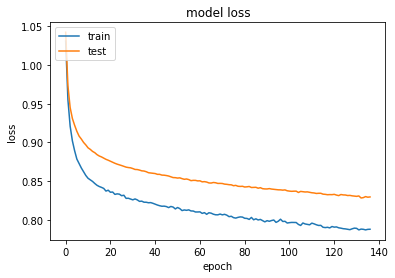

In [46]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
score,acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

77/77 - 0s - loss: 0.8308 - accuracy: 0.6752
score: 0.83
acc: 0.68


In [48]:
# load labels
with open('./Data_Array_Storage/labels_mfccavg_axis0_pol.pkl', 'rb') as f:
    lb = pickle.load(f)

In [49]:
# error analysis

preds = model.predict(X_test, 
                         batch_size=batch_size, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

77/77 [==============================] - 0s 3ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [50]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[150:180]

,actualvalues,predictedvalues
150,negative,neutral
151,negative,negative
152,positive,positive
153,negative,negative
154,negative,negative
155,negative,negative
156,negative,negative
157,negative,negative
158,neutral,negative
159,positive,negative


In [13]:
# the confusion matrix heat map plot
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

0.6752312435765673


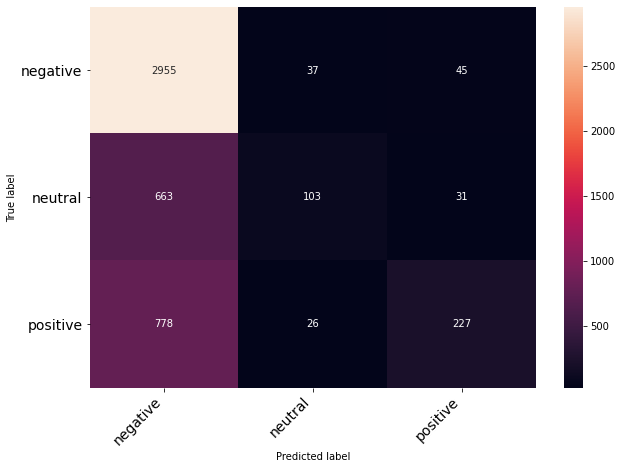

In [52]:
# Get the predictions file 
# finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [53]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

    negative       0.67      0.97      0.80      3037
     neutral       0.62      0.13      0.21       797
    positive       0.75      0.22      0.34      1031

    accuracy                           0.68      4865
   macro avg       0.68      0.44      0.45      4865
weighted avg       0.68      0.68      0.60      4865

